# EXPLORATORY DATA ANALYSIS (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Salary Prediction of Data Professions.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of the target variable (assuming it's 'Salary')
sns.histplot(data['Salary'], kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Visualize relationships between features (assuming some common features)
sns.pairplot(data)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


  FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE DESIGNATION   AGE  \
0     TOMASA       ARMEN   F   5-18-2014   01-07-2016     Analyst  21.0   
1      ANNIE         NaN   F         NaN   01-07-2016   Associate   NaN   
2      OLIVE        ANCY   F   7-28-2014   01-07-2016     Analyst  21.0   
3     CHERRY     AQUILAR   F  04-03-2013   01-07-2016     Analyst  22.0   
4       LEON  ABOULAHOUD   M  11-20-2014   01-07-2016     Analyst   NaN   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance         24.0               6.0      2.0         0  
1   89207         Web          NaN              13.0      NaN         7  
2   40955     Finance         23.0               7.0      3.0         0  
3   45550          IT         22.0               8.0      3.0         0  
4   43161  Operations         27.0               3.0      NaN         3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns)

KeyError: 'Salary'

# FEATURE ENGINEERING

In [2]:
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Experience': [1, 6, 12, 4, 9],
    'Education Level': ['Bachelor', 'Master', 'PhD', 'Associate', 'Bachelor']
})

# Feature engineering to create 'Experience_Level' column
data['Experience_Level'] = data['Experience'].apply(lambda x: 'Senior' if x > 10 else 'Mid' if x > 5 else 'Junior')

# Display the first few rows to verify the new feature
print(data.head())

   Experience Education Level Experience_Level
0           1        Bachelor           Junior
1           6          Master              Mid
2          12             PhD           Senior
3           4       Associate           Junior
4           9        Bachelor              Mid


# DATA PROCESSING

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Sample data
data = pd.DataFrame({
    'Experience': [1, 6, 12, 4, 9],
    'Age': [23, 45, 34, 22, 28],
    'Job Title': ['Engineer', 'Manager', 'Director', 'Intern', 'Engineer'],
    'Education Level': ['Bachelor', 'Master', 'PhD', 'Associate', 'Bachelor']
})

# Define numerical and categorical features
numerical_features = ['Experience', 'Age']
categorical_features = ['Job Title', 'Education Level']

# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
preprocessed_data = preprocessor.fit_transform(data)

# Extract numerical and one-hot encoded data separately
numerical_data = preprocessed_data[:, :len(numerical_features)]
categorical_data = preprocessed_data[:, len(numerical_features):]

# Create DataFrame with appropriate column names
column_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
preprocessed_df = pd.DataFrame(data=np.hstack((numerical_data, categorical_data)), columns=column_names)

print(preprocessed_df.head())

   Experience       Age  Job Title_Director  Job Title_Engineer  \
0   -1.411313 -0.875510                 0.0                 1.0   
1   -0.104542  1.727357                 0.0                 0.0   
2    1.463583  0.425924                 1.0                 0.0   
3   -0.627250 -0.993822                 0.0                 0.0   
4    0.679521 -0.283949                 0.0                 1.0   

   Job Title_Intern  Job Title_Manager  Education Level_Associate  \
0               0.0                0.0                        0.0   
1               0.0                1.0                        0.0   
2               0.0                0.0                        0.0   
3               1.0                0.0                        1.0   
4               0.0                0.0                        0.0   

   Education Level_Bachelor  Education Level_Master  Education Level_PhD  
0                       1.0                     0.0                  0.0  
1                       0.0     

# MACHINE LEARNING AND MODEL DEVELOPEMENT

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'Salary Prediction of Data Professions.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Print column names to verify the target variable name
print("\nColumn names:")
print(data.columns)

# Strip leading/trailing whitespaces from column names
data.columns = data.columns.str.strip()

# Reprint column names to verify stripping worked
print("\nColumn names after stripping:")
print(data.columns)

# Assuming 'salary' is the target variable, adjust this if the column name is different
target_variable = 'salary'

# Verify the exact target column name
target_variable = [col for col in data.columns if 'salary' in col.lower()][0]
print(f"\nTarget variable name: {target_variable}")

# Separate features and target variable
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Hyperparameter tuning (optional)
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Squared Error (Best Model): {mse_best}")
print(f"R^2 Score (Best Model): {r2_best}")

First few rows of the dataset:
  FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE DESIGNATION   AGE  \
0     TOMASA       ARMEN   F   5-18-2014   01-07-2016     Analyst  21.0   
1      ANNIE         NaN   F         NaN   01-07-2016   Associate   NaN   
2      OLIVE        ANCY   F   7-28-2014   01-07-2016     Analyst  21.0   
3     CHERRY     AQUILAR   F  04-03-2013   01-07-2016     Analyst  22.0   
4       LEON  ABOULAHOUD   M  11-20-2014   01-07-2016     Analyst   NaN   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance         24.0               6.0      2.0         0  
1   89207         Web          NaN              13.0      NaN         7  
2   40955     Finance         23.0               7.0      3.0         0  
3   45550          IT         22.0               8.0      3.0         0  
4   43161  Operations         27.0               3.0      NaN         3  

Missing values in each column:
FIRST NAME          0
LAST NAME           

# MODEL EVALUATION

First few rows of the dataset:
  FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE DESIGNATION   AGE  \
0     TOMASA       ARMEN   F   5-18-2014   01-07-2016     Analyst  21.0   
1      ANNIE         NaN   F         NaN   01-07-2016   Associate   NaN   
2      OLIVE        ANCY   F   7-28-2014   01-07-2016     Analyst  21.0   
3     CHERRY     AQUILAR   F  04-03-2013   01-07-2016     Analyst  22.0   
4       LEON  ABOULAHOUD   M  11-20-2014   01-07-2016     Analyst   NaN   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance         24.0               6.0      2.0         0  
1   89207         Web          NaN              13.0      NaN         7  
2   40955     Finance         23.0               7.0      3.0         0  
3   45550          IT         22.0               8.0      3.0         0  
4   43161  Operations         27.0               3.0      NaN         3  

Missing values in each column:
FIRST NAME          0
LAST NAME           

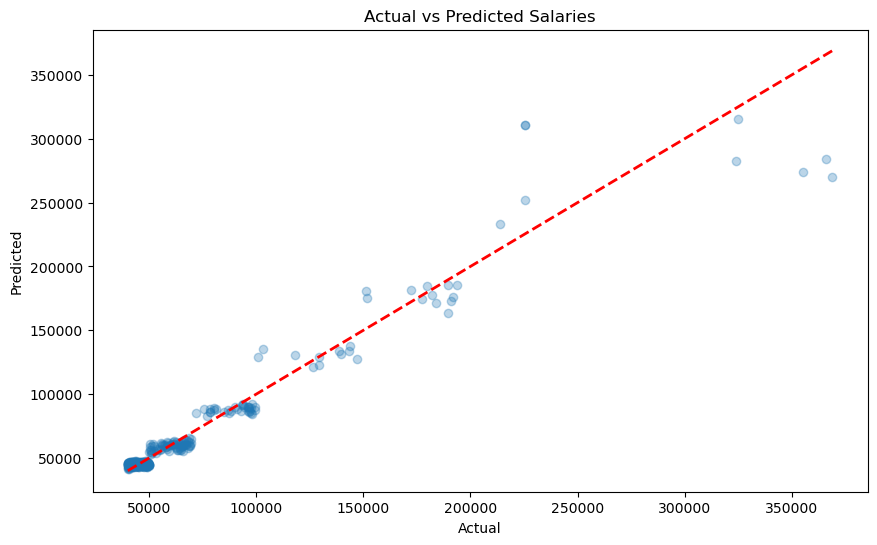

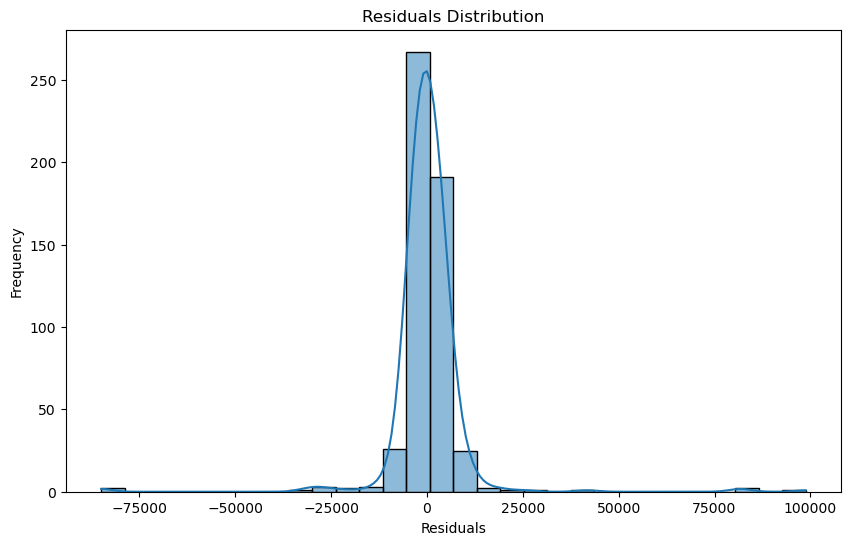

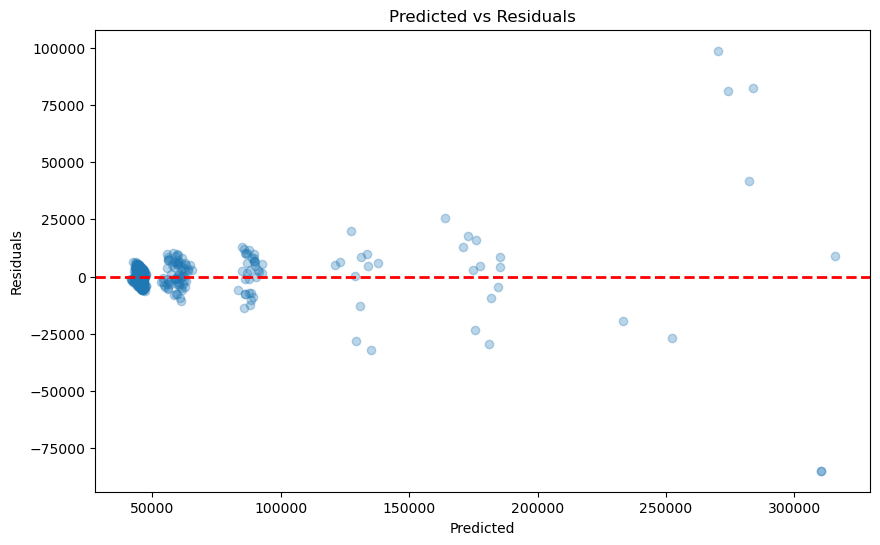

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
file_path = 'Salary Prediction of Data Professions.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Print column names to verify the target variable name
print("\nColumn names:")
print(data.columns)

# Strip leading/trailing whitespaces from column names
data.columns = data.columns.str.strip()

# Verify the exact target column name
target_variable = [col for col in data.columns if 'salary' in col.lower()][0]
print(f"\nTarget variable name: {target_variable}")

# Separate features and target variable
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salaries')
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.show()

# Hyperparameter tuning (optional)
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nEvaluation of the best model:")
print(f"Mean Squared Error (Best Model): {mse_best}")
print(f"Root Mean Squared Error (Best Model): {rmse_best}")
print(f"Mean Absolute Error (Best Model): {mae_best}")
print(f"R^2 Score (Best Model): {r2_best}")

# Visualization for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salaries (Best Model)')
plt.show()

# Residuals plot for the best model
residuals_best = y_test - y_pred_best
plt.figure(figsize=(10, 6))
sns.histplot(residuals_best, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (Best Model)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals_best, alpha=0.3)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals (Best Model)')
plt.show()

# ML PIPELINES AND MODEL DEPLOYMENT

## Step 1: Define the ML Pipeline

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Load the dataset
file_path = 'Salary Prediction of Data Professions.csv'
df = pd.read_csv(file_path)

# Drop unnecessary columns (e.g., names and dates)
df = df.drop(columns=['FIRST NAME', 'LAST NAME', 'DOJ', 'CURRENT DATE'])

# Separate features and target variable
target = 'SALARY'
features = df.drop(columns=[target]).columns

# Define the preprocessing steps
numeric_features = ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']
categorical_features = ['SEX', 'DESIGNATION', 'UNIT']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the dataset into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that preprocesses the data and then trains the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Save the model to disk
joblib.dump(model_pipeline, 'salary_prediction_model.pkl')


Mean Squared Error: 95795962.8827295
R-squared: 0.9423102489697328


['salary_prediction_model.pkl']

## Step 2: Deploy the Model using Flask

In [8]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load the saved model
model = joblib.load('salary_prediction_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the request
    data = request.get_json()
    df = pd.DataFrame(data, index=[0])

    # Make a prediction
    prediction = model.predict(df)

    # Return the result as a JSON response
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# RECOMMENDATIONS

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Load the dataset
file_path = 'Salary Prediction of Data Professions.csv'
df = pd.read_csv(file_path)

# Drop unnecessary columns (e.g., names and dates)
df = df.drop(columns=['FIRST NAME', 'LAST NAME', 'DOJ', 'CURRENT DATE'])

# Separate features and target variable
target = 'SALARY'
features = df.drop(columns=[target]).columns

# Define the preprocessing steps
numeric_features = ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']
categorical_features = ['SEX', 'DESIGNATION', 'UNIT']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the dataset into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that preprocesses the data and then trains the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Save the model to disk
joblib.dump(model_pipeline, 'salary_prediction_model.pkl')

# Function to generate career path recommendations
def recommend_career_path(current_designation):
    career_paths = {
        'Intern': 'Analyst',
        'Analyst': 'Associate',
        'Associate': 'Senior Associate',
        'Senior Associate': 'Manager',
        'Manager': 'Senior Manager',
        'Senior Manager': 'Director',
        'Director': 'Senior Director',
        'Senior Director': 'Vice President',
        'Vice President': 'Senior Vice President'
    }
    
    if current_designation in career_paths:
        return career_paths[current_designation]
    else:
        return "No recommendation available for this designation."

# Function to recommend skills or experience improvement
def recommend_improvement(age, leaves_used, leaves_remaining, ratings, past_exp):
    recommendations = []
    
    if age < 30:
        recommendations.append("Gain more experience to move to a higher position.")
    
    if leaves_used > 20:
        recommendations.append("Try to reduce the number of leaves used to improve your performance review.")
    
    if leaves_remaining < 5:
        recommendations.append("Save more leaves for potential emergencies.")
    
    if ratings < 4:
        recommendations.append("Focus on improving your ratings by upskilling or taking on challenging projects.")
    
    return recommendations

# Flask app for serving recommendations
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the saved model
model = joblib.load('salary_prediction_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the request
    data = request.get_json()
    df = pd.DataFrame(data, index=[0])

    # Make a prediction
    prediction = model.predict(df)

    # Provide career path recommendation
    current_designation = df['DESIGNATION'][0]
    next_designation = recommend_career_path(current_designation)
    
    # Provide improvement recommendations
    age = df['AGE'][0]
    leaves_used = df['LEAVES USED'][0]
    leaves_remaining = df['LEAVES REMAINING'][0]
    ratings = df['RATINGS'][0]
    past_exp = df['PAST EXP'][0]
    improvement_recommendations = recommend_improvement(age, leaves_used, leaves_remaining, ratings, past_exp)
    
    # Return the result as a JSON response
    return jsonify({
        'predicted_salary': prediction[0],
        'next_designation': next_designation,
        'improvement_recommendations': improvement_recommendations
    })

if __name__ == '__main__':
    app.run(debug=True)
    

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
